_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Name of student 1  
 yu Zhang Groupe C
 - Name of student 2 
 yongjia Zeng Groupe C

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [2]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [3]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example
</div>
<!-- Question End -->

In [4]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


In [6]:
# TODO : explore the dataset
print("number of example:",len(X)) 
print("number of features:",len(X[0]))
print("the ground truth of the 10th example:",Y[9])


number of example: 308
number of features: 6
the ground truth of the 10th example: 1.83


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
1. number of example: 308
2. number of features: 6
3. the ground truth of the 10th example: 1.83






</div>
<!-- Answer Section End -->

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?
</div>
<!-- Question End -->

In [5]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

1. on rajoute un colonne avec une valeur 1 de chaque feature
2. initialiser un constant 1 qui peut faire la multiplication avec W0, pour garder la valeur W0 dans la sortie de la fonction de perceptron.





</div>
<!-- Answer Section End -->

## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples
</div>
<!-- Question End -->

In [7]:
# TODO
w =np.zeros(len(X[0])) 

def h(w, x):      
    j = 0.0
    for i in range(len(x)):
        j+=w[i]*x[i]
    return j 
# print the ground truth and the evaluation of h_w on the first example
print("the ground truth of the first element:",Y[0],"\n the evaluation of h_w on the first example:",h(w,X[0]))

the ground truth of the first element: 8.62 
 the evaluation of h_w on the first example: 0.0


## Loss function
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.
</div>
<!-- Question End -->

In [8]:

def loss(w, x, y):
    return (abs(y-h(w,x)))**2

print ("for the first example: ",loss(w,X[0],Y[0])) 
print(w)

for the first example:  74.30439999999999
[0. 0. 0. 0. 0. 0.]


## Empirical loss
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
</div>
<!-- Question End -->

In [9]:
# TODO
def emp_loss(w, X, Y):
    somme=0.0
    for i in range(len(X)):
        somme+=(loss(w,X[i],Y[i]))/(len(X)) #len(x) est taille de example
    return somme
print(emp_loss(w,X,Y)) 
print(w)


339.24674642857144
[0. 0. 0. 0. 0. 0.]


## Gradient update

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 18 of the perceptron lecture slides for an example)
</div>
<!-- Question End -->

In [10]:
# TODO
def compute_update(w, X, Y, alpha):
    dw = np.zeros(len(X[0]))
    for j in range(len(X)):
        y = Y[j]
        x = X[j]
        for i in range(len(X[0])):
            x_i = x[i]
            dw[i] += alpha * (y-h(w,x))*x_i
    w = w + dw
    return w
compute_update(w, X, Y, alpha = 10e-7)

array([-0.00756342,  0.00182051,  0.01547611,  0.01269435,  0.01036508,
        0.00130996])

## Gradient descent
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights
</div>
<!-- Question End -->

In [11]:
# TODO
def descent(w_init, X, Y, alpha, max_iter):
    iter=0
    losses=[]
    while(iter<max_iter):
        iter+=1
        w_init = compute_update(w_init,X,Y,alpha)
        losses.append(emp_loss(w_init,X,Y))
    return w_init,losses
print(w)

[0. 0. 0. 0. 0. 0.]


## Exploitation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
</div>
<!-- Question End -->

[ 0.21022896 -0.17194535  0.11470446  0.96699115  0.72762126  0.66113694
  0.44026962]


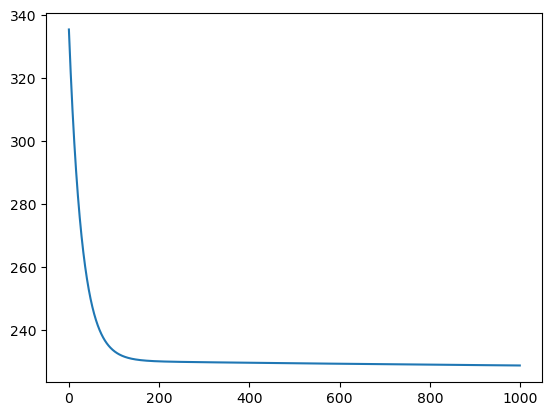

In [15]:
# TODO

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
w = np.zeros(7)
w,losses=descent(w,X,Y,10e-7,1000)
print(w)
plt.plot(losses)



In [26]:
w=np.zeros(7)
w,losses=descent(w,X,Y,10e-5,1000)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
- c'est une courbe d'erreur converge
- plus le courbe d'erreur converge, plus rapprocher des points d'origine.      
- non, car l'erreur n'est pas encore converge vers 0



</div>
<!-- Answer Section End -->

Text(0, 0.5, 'f(examples)')

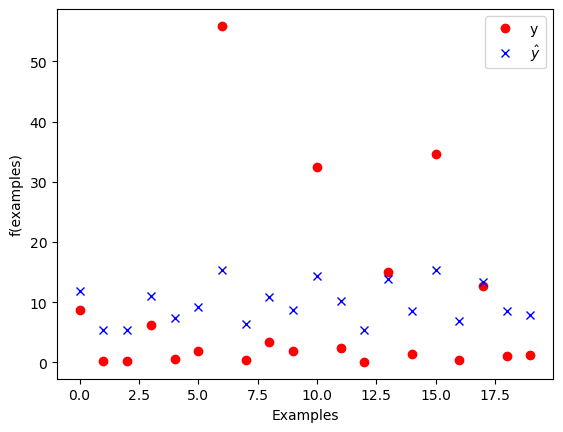

In [29]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")






# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?
</div>
<!-- Question End -->


### Improvements to gradient descent

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations
</div>
<!-- Question End -->


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**







</div>
<!-- Answer Section End -->